In [2]:
import os
import openai
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
openai.api_type = "open_ai"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = "https://api.openai.com/v1"
openai.api_version = None

In [4]:
def completion_request(prompt, model=None, engine=None, temperature=0, max_tokens=2000, top_p=1.0, best_of=1, echo=False, sleep_seconds=None):
    """submits request to openai endpoint."""
    if sleep_seconds:        
        time.sleep(sleep_seconds)
        
    response = openai.Completion.create(
          model=model,
          engine=engine,
          prompt=prompt, 
          temperature=temperature,
          max_tokens=max_tokens,
          top_p=top_p,
          frequency_penalty=0,
          presence_penalty=0,
          best_of=best_of,
          stop=None)
    
    return response.choices[0]['text'] if 'choices' in response else None


def chat_completion_request(messages, temperature=0, max_tokens=256, top_p=1.0):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo", 
      messages=messages)
    
    return response['choices'][0]['message']['content']

In [5]:
df = pd.read_csv('pitchfork.csv')

In [6]:
df.head()

,artist,album,genre,score,date,author,role,review,bnm,link,label,release_year
0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...,Nonesuch,2018.0
1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...,Planet Uterus,2019.0
2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...,Self-released,2019.0
3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...,Telephone Explosion,2018.0
4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...,"Disruptor,Columbia",2018.0


In [7]:
def generate_review(artist, album, genre, score):
    messages = [
        {"role": "system", "content": "You are an agent to help generate human-like reviews for music albums."},
        {"role": "user", "content": f"Write a a long and insightful music review for the music album '{album}' by {artist}. The music genre is {genre} with a rating of {score} out of 10. The review must meet the following criteria:"},
        {"role": "user", "content": "1. written in a conversational tone, with sophisticated sentence structure and language."},
        {"role": "user", "content": "2. includes details about the band's history and the album's creation story."},
        {"role": "user", "content": "3. includes personal experience and opinions."},
        {"role": "user", "content": "Review:"},
    ]
    return chat_completion_request(messages, temperature=1.0, max_tokens=2048, top_p=1.0)


# row = df.sample(1).iloc[0]
# print(row['review'])
# generate_review(row['artist'], row['album'], row['genre'], row['score'])

tqdm.pandas()

df_sampled = df.sample(500)
df_sampled['fake_review'] = df_sampled.progress_apply(lambda x: generate_review(x['artist'], x['album'], x['genre'], x['score']), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [2:43:29<00:00, 19.62s/it]


In [8]:
df_sampled

,artist,album,genre,score,date,author,role,review,bnm,link,label,release_year,fake_review
3186,Peter Bjorn and John,Breakin’ Point,Rock,5.7,June 9 2016,Jazz Monroe,Associate Staff Writer,"An indie band’s commercial breakthrough, when ...",0,https://pitchfork.com/reviews/albums/21961-bre...,Ingrid,2016.0,"Hey there music lovers, today I want to talk a..."
13932,"Avey Tare, Kría Brekkan",Pullhair Rubeye,"Experimental,Electronic",1.0,April 26 2007,Mark Richardson,Contributor,It's possible to listen to and discuss this al...,0,https://pitchfork.com/reviews/albums/10153-pul...,Paw Tracks,2007.0,Welcome to the sonic world of Avey Tare and Kr...
20133,Spring Heel Jack,Masses,Jazz,8.6,June 5 2001,Christopher Dare,NaN,Spring Heel Jack entered the electronica scene...,0,https://pitchfork.com/reviews/albums/7438-masses/,Thirsty Ear,2001.0,Spring Heel Jack's 'Masses' is a jazz masterpi...
1068,Tyga,Kyoto,Rap,3.3,February 23 2018,Torii MacAdams,NaN,"Tyga is preposterous. He’s a platonic doofus, ...",0,https://pitchfork.com/reviews/albums/tyga-kyoto/,"Last Kings,EMPIRE",2018.0,Greetings fellow music lovers! Today I've got ...
8391,Various Artists,Rush Hour Presents Amsterdam All Stars,NaN,6.4,January 12 2012,Andrew Gaerig,Contributor,It says something about the state of electroni...,0,https://pitchfork.com/reviews/albums/16169-rus...,Rush Hour,2011.0,"Every now and then, a music album comes along ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,Kitty Pryde,haha i'm sorry EP,Rap,6.0,June 27 2012,Lindsay Zoladz,Contributor,"Earlier this year, the The New York Times repo...",0,https://pitchfork.com/reviews/albums/16894-hah...,Self-released,2012.0,"If you're a fan of rap music, you've probably ..."
8931,Father's Children,Who's Gonna Save the World,NaN,7.4,July 8 2011,Joe Tangari,Contributor,"At the end of the 1960s, three high school fri...",0,https://pitchfork.com/reviews/albums/15619-who...,Numero Group,2011.0,Who's Gonna Save the World by Father's Childre...
8385,The Big Pink,Future This,Rock,5.2,January 16 2012,Ian Cohen,Contributor,"Sonically, the Big Pink's 2009 debut delivere...",0,https://pitchfork.com/reviews/albums/16122-fut...,4AD,2012.0,"When it comes to rock music, few bands are abl..."
16572,Th' Legendary Shack-Shakers,Believe,Rock,7.2,February 16 2005,Joe Tangari,Contributor,"With a title like Believe, you'd think Th' Leg...",0,https://pitchfork.com/reviews/albums/4979-beli...,Yep Roc,2005.0,If you're looking for a gritty rock and roll a...


In [51]:
def evaluate_review(review_a, review_b):
    prompt = f"""You are comparing a model generated review and a human written review. Here are the reviews:
[BEGIN DATA]
************
[Review A]: {review_a}
************
[Review B]: {review_b}
************
[END DATA]

Compare the Review A and Review B, and determine which one is the human written review. Human written reviews are usually natural, smooth and logical.

First, write out in a step by step manner your reasoning to be sure that your conclusion is correct. 

At the end, provide your conclusion in the format of "Conclusion: [Review A|Review B]".

Answer:"""
    
    messages = [
        {"role": "system", "content": prompt},
    ]
    
    return chat_completion_request(messages, temperature=0.0, max_tokens=512, top_p=1.0)


row = df_sampled.sample(1).iloc[0]
print(row['review'])
print(row['fake_review'])
evaluate_review(row['review'], row['fake_review'])

# df_sampled['judgement'] = df_sampled[['review', 'fake_review']].progress_apply(lambda x: evaluate_review(x['review'], x['fake_review']), axis=1)

For as long as indie drummers have been riding hi-hats, Mahjongg have taken up the noble mission of keeping their home city weird. No one knows exactly what to expect from any given performance of theirs, and they've kept up the struggle of cultivating that spontaneity on record-- which has proven a much more difficult task. On their first EP, Machinegong, they were plastic pop purveyors, afro-poppers, dance-punkers, and whatever else the hell they felt like; scattered as the styles might have been, they struck an incredible balance on that first EP that they've less successfully charted on the records that have followed. But I can't blame them for not readily turning out another "Aluminum" or "Hot Lava". It must be chafing to be lumped in with the masses of one-trick ponies when Mahjongg were one of the only bands toying with beats from around the globe, not just early-eighties England. Now with the distance of a few years' time, we can hear how far apart Mahjongg are from the trend--

"1. Review A uses specific and detailed language, while Review B uses more generalized language that lacks detail.\n2. Review A includes specific references to the album's tracks and how they sound, while Review B focuses more on the overarching themes and emotions conveyed by the album.\n3. Review A includes a reference to the band's previous work and how it compares to the current album, while Review B does not.\n4. Review A includes a reference to the band's press releases, while Review B does not.\n5. Review A includes more complex sentences and uses more varied syntax, while Review B is more straightforward in its prose.\n6. Given these differences, it appears that Review A is the human written review, while Review B is the model generated review.\n\nConclusion: Review A is the human written review."

In [54]:
df_sampled.to_csv("result.csv", index=False)

In [13]:
from openai.embeddings_utils import get_embeddings, get_embedding, cosine_similarity

review_embeddings = get_embeddings(df_sampled['review'].to_list(), engine="text-embedding-ada-002")
fake_review_embeddings = get_embeddings(df_sampled['fake_review'].to_list(), engine="text-embedding-ada-002")

cosine_sims = [cosine_similarity(e1,e2) for e1, e2 in zip(review_embeddings, fake_review_embeddings)]
df_sampled['cosine_sim'] = cosine_sims

with open('review_embeddings.npy', 'wb') as f:
    np.save(f, review_embeddings)
with open('fake_review_embeddings.npy', 'wb') as f:
    np.save(f, fake_review_embeddings)

In [52]:
pd.set_option('display.max_colwidth', None)

df_sampled[['judgement', 'conclusion']].sample(3)

,judgement,conclusion
17775,"1. Review A has more complex sentence structures and vocabulary, indicating that it may have been generated by a model.\n2. Review B has a clear introduction and conclusion, as well as logical flow between paragraphs, suggesting it was written by a human.\n3. Review B provides more details about the band's history, musical approach, and themes explored in the album, indicating a deeper understanding of the subject matter.\n4. Review A focuses more on the technical aspects of the music and the artist's past work, with less emphasis on the emotional and creative aspects of the album.\n5. Based on the above observations, Review B is most likely the human-written review.\n\nConclusion: Review B",Review B
15185,"1. Review A has a more conversational tone with contractions and slang usage, while Review B is more formal.\n2. Review A includes more specific details about the band's history, live performance, and specific songs on the album, while Review B provides more general information about the album and the band's sound.\n3. Review A has a more poetic writing style with metaphors and descriptive language, while Review B focuses more on describing the sound of the album.\n4. Review A has a more witty and sarcastic tone at times, while Review B remains neutral in tone.\n5. Based on the above differences, Review A is likely the human written review. \n\nConclusion: Review A.",Review B
18930,"Step 1: Review A uses more complex vocabulary and sentence structure, while Review B is more straightforward.\n\nStep 2: Review A makes specific references to various songs and artists on the tribute album, while Review B only mentions a few personal favorites.\n\nStep 3: Review A includes personal opinions on Kristofferson's songwriting abilities and critiques of some of the cover versions, while Review B only praises the album as a whole.\n\nStep 4: Review A includes humorous asides and personal anecdotes, while Review B is more formal.\n\nConclusion: Based on the use of more complex language, personal opinions and anecdotes, and specific references to various songs and artists, we can determine that Review A is the human written review.",Review A


<AxesSubplot: >

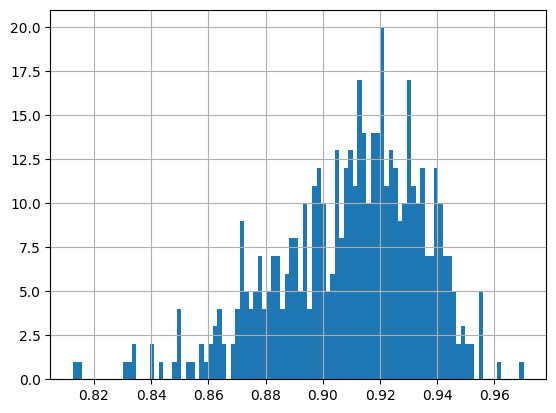

In [57]:
df_sampled['cosine_sim'].hist(bins=100)

In [65]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


def fit_tsne(X):
    tsne = TSNE(n_components=2)
    arr = tsne.fit_transform(X)
    df_tsne = pd.DataFrame(arr, columns=['tsne_0', 'tsne_1'])
    return df_tsne
    
df_tsne = fit_tsne(np.asarray(review_embeddings))
df_tsne['label'] = 'Review A'
df_tsne_fake = fit_tsne(np.asarray(fake_review_embeddings))
df_tsne_fake['label'] = 'Review B'
df_plot = pd.concat([df_tsne, df_tsne_fake], axis=0)

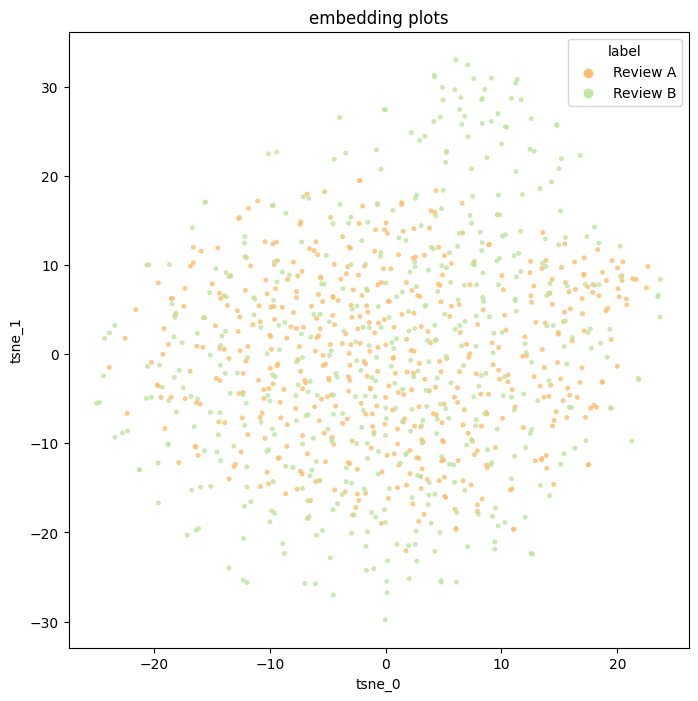

In [73]:
color_palette = sns.color_palette("Spectral", n_colors=df_plot['label'].nunique())    
plt.figure(figsize=(8, 8))
plt.title("embedding plots")
ax = sns.scatterplot(
    data=df_plot,
    x="tsne_0",
    y="tsne_1",
    hue='label',
    palette=color_palette,
    alpha=0.8,
    marker=".",
    edgecolor=None,
    legend=True
)
plt.show()